In [1]:
#TODO
# - fazer analise com funções quadraticas simples
# - fazer analise com funções quadraticas criadas aleatoriamente
#     - criar função para gerar quadraticas convexas e nao convexas aleatoriamente (strongly convex é facil)
# - fazer calculo do gradiente da softmax
# - 

# Bibliotecas a serem usados no projeto

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

2024-11-27 17:53:18.044818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732740798.057099   97674 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732740798.060555   97674 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 17:53:18.073916: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Parte 1: gradiente descendente em funções quadráticas

Ao implementar um algoritmo de descida de gradiente, podemos escolher dentre diversos métodos para escolha do tamanho do passo a ser dado. Aqui, exploraremos dois deles: short-step e busca em linha exata.

## Preparação das funções quadráticas

Sabemos que para funções diferenciáveis, uma possível definição de convexidade forte é se a função pode ser cotada inferiormente por uma quadrática de coefficiente $m>0$. Em outras palavras, temos:

$$f(y) \geq f(x)+\nabla f(x)^T(y-x)+\frac{m}{2}\|y-x\|^2 \hspace{10pt} \forall x,y \in \text{Dom}(f)$$

Além disso, se a função é duplamente continuamente diferenciável - o que seria o caso neste exercício, já que lidamos apenas com quadráticas - uma outra maneira de caracterizar convexidade forte é pela propriedade

$$ \nabla^2 f(x) \succeq mI  \implies Q - mI \succeq 0. $$

Logo, teremos que definir $Q$ de tal modo que possua paenas autovalores positivos para os casos fortemente convexos, e pelo menos um autovalor nulo para o caso convexo. A função não convexa por sua vez possuirá pelo menos um autovalor negativo.

In [3]:
def BuildQuadratic(n:int=2, convexity:str='stronglyConvex', seed:int=0):

    Q = np.zeros((n,n))
    b = np.zeros(n)



    match convexity:
        case 'stronglyConvex':
            pass
        case 'convex':
            pass
        case 'nonConvex':
            pass


def StronglyConvexQuadratic(x:np.array):

    Q = np.array([[2, 1],[1, 3]])
    Q = Q.T @ Q

    b = np.array([0,0])

    c = 0

    return x.T @ Q @ x + b.T @ x + c

def ConvexQuadratic(x:np.array):

    Q = np.array([[2, 1],[8, 4]])

    b = np.array([0,0])

    c = 0

    return x.T @ Q @ x + b.T @ x + c

def NonConvexQuadratic(x:np.array):

    Q = np.array([[2, 1],[8, 4]])

    b = np.array([0,0])

    c = 0

    return x.T @ Q @ x + b.T @ x + c

def discretizedFunction(x0:np.ndarray, x1:np.ndarray, function:callable):
    functionValues = np.zeros((x0.size, x1.size))
    for i in range(x0.size):
        for j in range(x1.size):
            functionValues[j, i] = function(np.array([x0[i], x1[j]]))
    return functionValues

In [4]:

# Preparando função fortemente convexa
Q = np.array([[20, 1],[1, 3]])
Q = Q.T @ Q
b = np.array([0,0])
c = 0

stronglyConvex = lambda x: x.T @ Q @ x + b.T @ x + c
stronglyConvexGradient = lambda x: Q @ x + b

# Calculando constante de Lipschitz  
eigValues, eigvectors = np.linalg.eig(Q)
print(eigValues)
lipschitzL = np.max(eigValues)
stepSize = 1/lipschitzL


# Preparando parametros para rodar gradiente descendente
objective = stronglyConvex
objectiveGradient = stronglyConvexGradient
maxSteps = 1000
iter = 1
gradientNormStop = 1e-3
initialPoint = np.array([1,1])

# Iteração zero do algoritmo
point = initialPoint
gradient = objectiveGradient(point)
gradientNorm = np.linalg.norm(gradient)
objectiveValue = objective(point)

while iter < maxSteps and gradientNorm > gradientNormStop:

    point = point - stepSize*gradient
    gradient = objectiveGradient(point)
    gradientNorm = np.linalg.norm(gradient)
 
    iter = iter + 1

    if(iter%100 == 0):
        print(iter)

print(point, objective(point), gradientNorm)


[402.34829184   8.65170816]
100
200
300
400
[-6.64532934e-06  1.13360157e-04] 1.1156105703479268e-07 0.0009824427248335983


In [7]:
samples = 100
conditionNumbers = []
finalGradientNorms = []
finalObjectiveValues = []

for q11 in range(1, samples+1):    
    # Preparando função fortemente convexa
    Q = np.array([[q11, 1],[1, 3]])
    Q = Q.T @ Q
    b = np.array([0,0])
    c = 0

    stronglyConvex = lambda x: x.T @ Q @ x + b.T @ x + c
    stronglyConvexGradient = lambda x: Q @ x + b

    # Calculando constante de Lipschitz  
    eigValues, eigvectors = np.linalg.eig(Q)
    maxEig = np.max(eigValues)
    minEig = np.min(eigValues)
    stepSize = 1/maxEig


    # Preparando parametros para rodar gradiente descendente
    objective = stronglyConvex
    objectiveGradient = stronglyConvexGradient
    maxSteps = 1000
    iter = 1
    gradientNormStop = 1e-3
    initialPoint = np.array([1,1])

    # Iteração zero do algoritmo
    point = initialPoint
    gradient = objectiveGradient(point)
    gradientNorm = np.linalg.norm(gradient)
    objectiveValue = objective(point)

    while iter < maxSteps and gradientNorm > gradientNormStop:

        point = point - stepSize*gradient
        gradient = objectiveGradient(point)
        gradientNorm = np.linalg.norm(gradient)
    
        iter = iter + 1

    conditionNumbers.append(maxEig/minEig)
    finalGradientNorms.append(gradientNorm)
    finalObjectiveValues.append(objective(point))

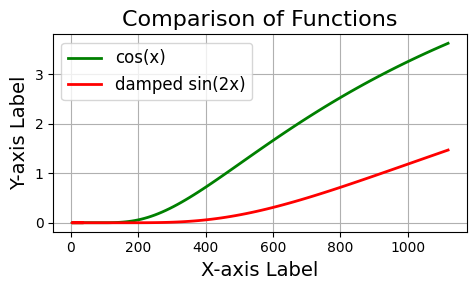

In [16]:
x = range(1, samples+1)

plt.figure(figsize=(5, 3))
# plt.plot(x, conditionNumbers, label='sin(x)', color='blue', linewidth=2)
plt.plot(conditionNumbers, finalGradientNorms, label='cos(x)', color='green', linewidth=2)
plt.plot(conditionNumbers, finalObjectiveValues, label='damped sin(2x)', color='red', linewidth=2)

plt.title('Comparison of Functions', fontsize=16)
plt.xlabel('X-axis Label', fontsize=14)
plt.ylabel('Y-axis Label', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

## Plot e análises das funções

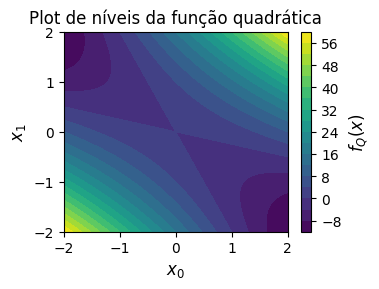

In [19]:
# Calculando valores das funções 
x0 = np.linspace(-2, 2, 1000)
x1 = np.linspace(-2, 2, 1000)

functionValuesQ = discretizedFunction(x0, x1, ConvexQuadratic)

# Criando plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))

# Plot da função quadrática
contour1 = ax1.contourf(x0, x1, functionValuesQ, levels=20, cmap='viridis')
colorBar1 = fig.colorbar(contour1, ax=ax1)
colorBar1.set_label(label='$f_Q(x)$', fontsize=12)
ax1.set_xlabel('$x_0$', fontsize=12)
ax1.set_ylabel('$x_1$', fontsize=12)
ax1.set_title('Plot de níveis da função quadrática', fontsize=12)
ax1.axis('tight')


plt.tight_layout()
plt.show()

## Gradiente descendente com busca em linha exata

## Gradiente descendente com short-step

# Parte 2: classificação multinomial no dataset MNIST

## Cáculo do gradiente da função objetivo da softmax regression

A função custo para a regressão logística multinomial é dada por

$$ J(\theta) = -\left[ \sum_{i=1}^{m}\sum_{k=1}^{K} \delta(y^i=k) \log \left( \frac{\exp ({\theta^k}^Tx^i)}{\sum_{j=1}^{K}\exp({\theta^j}^Tx^i)} \right) \right], $$


e seu gradiente por sua vez é

$$ \nabla_{\theta^k}J(\theta) = -\sum_{i=1}^{m} \left[ x^i (\delta (y^i=k) - \frac{\exp ({\theta^k}^Tx^i)}{\sum_{j=1}^{K}\exp({\theta^j}^Tx^i)} ) \right] $$ 


## Carregando base de dados MNIST e preparando conjuntos de treino/teste

In [ ]:
# Load the MNIST dataset
(mnist_train, mnist_test) = tf.keras.datasets.mnist.load_data()

# Separate features and labels for training and testing
(x_train, y_train) = mnist_train
(x_test, y_test) = mnist_test

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0